In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [2]:
dataTraining = pd.read_csv('https://github.com/albahnsen/AdvancedMethodsDataAnalysisClass/raw/master/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)
dataTraining

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6
...,...,...,...,...,...
8417,2010,Our Family Wedding,""" our marriage , their wedding . "" it ' s l...","['Comedy', 'Romance']",4.9
1592,1984,Conan the Destroyer,"the wandering barbarian , conan , alongside ...","['Action', 'Adventure', 'Fantasy']",5.8
1723,1955,Kismet,"like a tale spun by scheherazade , kismet fol...","['Adventure', 'Musical', 'Fantasy', 'Comedy', ...",6.4
7605,1982,The Secret of NIMH,"mrs . brisby , a widowed mouse , lives in a...","['Animation', 'Adventure', 'Drama', 'Family', ...",7.6


In [3]:
plots = dataTraining['plot']
y = (dataTraining['rating'] >= dataTraining['rating'].mean()).astype(int)

In [4]:
plots

3107    most is the story of a single father who takes...
900     a serial killer decides to teach the secrets o...
6724    in sweden ,  a female blackmailer with a disfi...
4704    in a friday afternoon in new york ,  the presi...
2582    in los angeles ,  the editor of a publishing h...
                              ...                        
8417    " our marriage ,  their wedding .  "  it ' s l...
1592    the wandering barbarian ,  conan ,  alongside ...
1723    like a tale spun by scheherazade ,  kismet fol...
7605    mrs .  brisby ,  a widowed mouse ,  lives in a...
215     tinker bell journey far north of never land to...
Name: plot, Length: 7895, dtype: object

In [5]:
y

3107    1
900     0
6724    1
4704    1
2582    1
       ..
8417    0
1592    0
1723    0
7605    1
215     1
Name: rating, Length: 7895, dtype: int64

In [6]:
#y = dataTraining.rating
#y.describe()

In [7]:
# use CountVectorizer to create document-term matrices from X
vect = CountVectorizer()
X_dtm = vect.fit_transform(plots)

In [8]:
vect.vocabulary_

{'most': 22846,
 'is': 17877,
 'the': 34508,
 'story': 33055,
 'of': 24185,
 'single': 31438,
 'father': 12359,
 'who': 37786,
 'takes': 34005,
 'his': 16034,
 'eight': 10821,
 'year': 38375,
 'old': 24256,
 'son': 32083,
 'to': 34893,
 'work': 38162,
 'with': 38027,
 'him': 15986,
 'at': 1929,
 'railroad': 27678,
 'drawbridge': 10263,
 'where': 37720,
 'he': 15557,
 'bridge': 4221,
 'tender': 34346,
 'day': 8475,
 'before': 2928,
 'boy': 4008,
 'meets': 21834,
 'woman': 38094,
 'boarding': 3661,
 'train': 35219,
 'drug': 10372,
 'abuser': 124,
 'goes': 14368,
 'into': 17697,
 'engine': 11238,
 'room': 29487,
 'and': 1151,
 'tells': 34305,
 'stay': 32798,
 'edge': 10730,
 'nearby': 23411,
 'lake': 19341,
 'ship': 31091,
 'comes': 6638,
 'lifted': 20001,
 'though': 34651,
 'it': 17932,
 'supposed': 33588,
 'arrive': 1696,
 'an': 1105,
 'hour': 16402,
 'later': 19511,
 'happens': 15312,
 'sees': 30591,
 'this': 34616,
 'tries': 35469,
 'warn': 37377,
 'not': 23884,
 'able': 59,
 'see': 3

In [9]:
vect = CountVectorizer(lowercase=True, stop_words='english', ngram_range=(1,1))
X_dtm = vect.fit_transform(plots)
X_dtm.shape

(7895, 38370)

In [10]:
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(vect):
    X_dtm = vect.fit_transform(plots)
    print('Features: ', X_dtm.shape[1])
    nb = MultinomialNB()
    print(pd.Series(cross_val_score(nb, X_dtm, y, cv=10)).describe())

In [11]:
# set of stop words
print(vect.get_stop_words())

frozenset({'several', 'un', 'bill', 'afterwards', 'others', 'many', 'they', 'wherever', 'nor', 'via', 'done', 'besides', 'such', 'fifty', 'with', 'whither', 'below', 'every', 'show', 'into', 'because', 'another', 'fifteen', 'almost', 'find', 'upon', 'eleven', 'few', 'hers', 'whether', 'she', 'still', 'have', 'you', 'herself', 'own', 'perhaps', 'hereupon', 'or', 'part', 'therein', 'were', 'couldnt', 'no', 'we', 'six', 'than', 'again', 'your', 'anywhere', 'system', 'please', 'their', 'should', 'well', 'nevertheless', 'formerly', 'against', 're', 'during', 'amongst', 'side', 'something', 'toward', 'the', 'rather', 'ours', 'four', 'first', 'may', 'hasnt', 'myself', 'somehow', 'why', 'together', 'whatever', 'this', 'mill', 'himself', 'either', 'between', 'fire', 'ie', 'an', 'beyond', 'me', 'how', 'what', 'our', 'on', 'seemed', 'from', 'though', 'neither', 'yourselves', 'can', 'even', 'only', 'take', 'beside', 'until', 'much', 'his', 'at', 'latterly', 'keep', 'over', 'along', 'nothing', 'thi

In [12]:
vect.vocabulary_

{'story': 32833,
 'single': 31227,
 'father': 12273,
 'takes': 33780,
 'year': 38079,
 'old': 24081,
 'son': 31862,
 'work': 37867,
 'railroad': 27483,
 'drawbridge': 10195,
 'bridge': 4169,
 'tender': 34120,
 'day': 8413,
 'boy': 3956,
 'meets': 21690,
 'woman': 37799,
 'boarding': 3611,
 'train': 34962,
 'drug': 10304,
 'abuser': 122,
 'goes': 14261,
 'engine': 11161,
 'room': 29290,
 'tells': 34080,
 'stay': 32577,
 'edge': 10659,
 'nearby': 23253,
 'lake': 19207,
 'ship': 30885,
 'comes': 6579,
 'lifted': 19863,
 'supposed': 33365,
 'arrive': 1666,
 'hour': 16282,
 'later': 19376,
 'happens': 15204,
 'sees': 30388,
 'tries': 35212,
 'warn': 37109,
 'able': 59,
 'just': 18388,
 'oncoming': 24139,
 'approaches': 1458,
 'falls': 12122,
 'gear': 13829,
 'works': 37883,
 'attempting': 1958,
 'lower': 20372,
 'leaving': 19546,
 'horrific': 16210,
 'choice': 5841,
 'lowers': 20375,
 'gears': 13831,
 'crushing': 7946,
 'people': 25307,
 'completely': 6737,
 'oblivious': 23904,
 'fact': 120

In [13]:
len(vect.vocabulary_)

38370

In [14]:
vect.get_feature_names()[20000:20500]

['lip',
 'lippe',
 'lipped',
 'lips',
 'lipski',
 'lipsky',
 'lipstick',
 'lipsticks',
 'lipsynching',
 'liquefies',
 'liquid',
 'liquidatable',
 'liquidate',
 'liquidating',
 'liquidator',
 'liquids',
 'liquor',
 'lisa',
 'lisbeth',
 'lisbon',
 'lise',
 'lisp',
 'lisping',
 'lissa',
 'list',
 'listed',
 'listen',
 'listened',
 'listener',
 'listeners',
 'listening',
 'listens',
 'lister',
 'listing',
 'lists',
 'lit',
 'litany',
 'literacy',
 'literal',
 'literally',
 'literary',
 'literate',
 'literature',
 'litgo',
 'lithgow',
 'lithium',
 'lithuania',
 'lithuanian',
 'litigation',
 'litigator',
 'littered',
 'little',
 'littlefoot',
 'littles',
 'littlewolf',
 'liu',
 'liv',
 'livable',
 'live',
 'lived',
 'livelihood',
 'livelihoods',
 'lively',
 'liven',
 'liver',
 'livermore',
 'liverpool',
 'liverpudlian',
 'lives',
 'livesey',
 'livestock',
 'livia',
 'livid',
 'livie',
 'livin',
 'living',
 'livingston',
 'livingstone',
 'liz',
 'lizard',
 'lizards',
 'lizewski',
 'lizzie',
 

In [15]:
import keras
from keras import backend as K


In [16]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence


In [17]:
from livelossplot import PlotLossesKeras
%matplotlib inline

In [18]:
X = dataTraining['plot'].tolist()

In [19]:
# For vocabulary only the intersec characters is used to avoid issues with data collection
voc = set(''.join(X))
vocabulary = {x: idx + 1 for idx, x in enumerate(set(voc))}

In [20]:
vocabulary


{'è': 1,
 'á': 2,
 '=': 3,
 '!': 4,
 'k': 5,
 '%': 6,
 'â': 7,
 '¡': 8,
 'y': 9,
 'v': 10,
 'ù': 11,
 'ø': 12,
 'ñ': 13,
 'ó': 14,
 'r': 15,
 'm': 16,
 'í': 17,
 'ï': 18,
 'o': 19,
 'ú': 20,
 '&': 21,
 '\xa0': 22,
 'q': 23,
 'n': 24,
 'ä': 25,
 'l': 26,
 't': 27,
 '"': 28,
 'N': 29,
 'é': 30,
 ';': 31,
 'ò': 32,
 'u': 33,
 '?': 34,
 '$': 35,
 'å': 36,
 '¹': 37,
 'c': 38,
 'f': 39,
 'p': 40,
 '®': 41,
 '°': 42,
 'j': 43,
 's': 44,
 'w': 45,
 '/': 46,
 'b': 47,
 "'": 48,
 '(': 49,
 'ô': 50,
 'ç': 51,
 'ê': 52,
 'x': 53,
 'e': 54,
 'd': 55,
 'i': 56,
 ',': 57,
 'ʼ': 58,
 'g': 59,
 'ü': 60,
 'a': 61,
 'ë': 62,
 ')': 63,
 ':': 64,
 '-': 65,
 '½': 66,
 'h': 67,
 'û': 68,
 '£': 69,
 'ö': 70,
 'z': 71,
 'à': 72,
 '.': 73,
 ' ': 74}

In [21]:
# Max len
max_text_len = 300
X = [x[:max_text_len] for x in X]
# Convert characters to int and pad
X = [[vocabulary[x1] for x1 in x if x1 in vocabulary.keys()] for x in X]

In [22]:
dataTraining['plot'].tolist()

['most is the story of a single father who takes his eight year - old son to work with him at the railroad drawbridge where he is the bridge tender .  a day before ,  the boy meets a woman boarding a train ,  a drug abuser .  at the bridge ,  the father goes into the engine room ,  and tells his son to stay at the edge of the nearby lake .  a ship comes ,  and the bridge is lifted .  though it is supposed to arrive an hour later ,  the train happens to arrive .  the son sees this ,  and tries to warn his father ,  who is not able to see this .  just as the oncoming train approaches ,  his son falls into the drawbridge gear works while attempting to lower the bridge ,  leaving the father with a horrific choice .  the father then lowers the bridge ,  the gears crushing the boy .  the people in the train are completely oblivious to the fact a boy died trying to save them ,  other than the drug addict woman ,  who happened to look out her train window .  the movie ends ,  with the man wand

In [23]:
X_pad = sequence.pad_sequences(X, maxlen=max_text_len)

In [24]:
X_pad


array([[16, 19, 44, ..., 24, 74, 27],
       [ 0,  0,  0, ...,  5, 74, 73],
       [56, 24, 74, ..., 56, 16, 44],
       ...,
       [ 0,  0,  0, ..., 55, 74, 73],
       [16, 15, 44, ..., 44, 74, 27],
       [ 0,  0,  0, ..., 54, 74, 73]], dtype=int32)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.33, random_state=42)

In [26]:
model = Sequential()
model.add(Embedding(len(vocabulary) + 1, 128, input_length=max_text_len))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 128)          9600      
_________________________________________________________________
lstm (LSTM)                  (None, 32)                20608     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 30,241
Trainable params: 30,241
Non-trainable params: 0
_________________________________________________________________


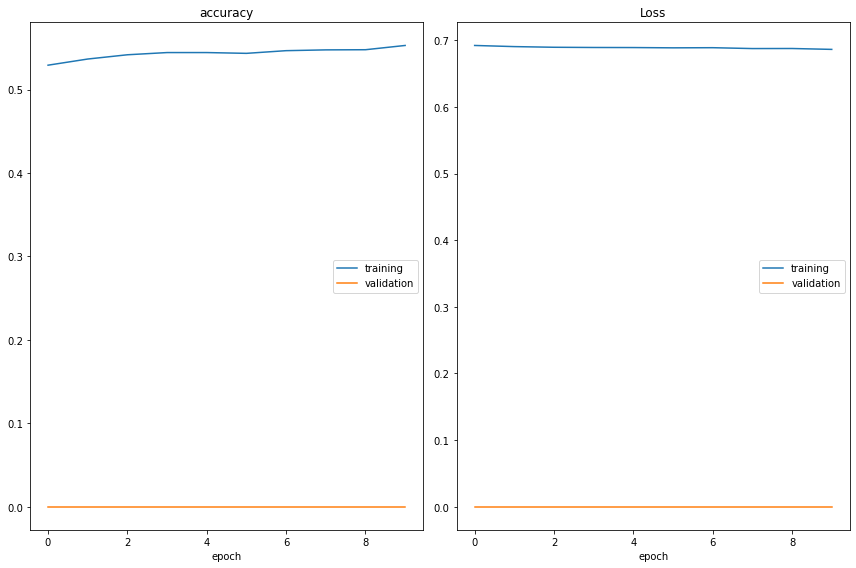

accuracy
	training         	 (min:    0.529, max:    0.553, cur:    0.553)
	validation       	 (min:    0.000, max:    0.000, cur:    0.000)
Loss
	training         	 (min:    0.686, max:    0.692, cur:    0.686)
	validation       	 (min:    0.000, max:    0.000, cur:    0.000)


In [27]:
model.fit(X_train, y_train, validation_data=[X_test, y_test], 
          batch_size=128, epochs=10, verbose=1,
          callbacks=[PlotLossesKeras()])

In [28]:
y_pred = model.predict_classes(X_test)[:,0]

print((y_pred == y_test).mean())

/opt/anaconda3/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.5625479662317728
